# Running a grid of models

This notebook will show you how to run a grid of Schwarzschild models. Let's read in the same configuration file as before 

In [1]:
import dynamite as dyn

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, silent=True)

No previous models have been found:
Making an empty table in AllModels.table


Here I'll make one manual change to a value specified in the configuration file: in order to save time, let's set the maximum number of models to be run to be 10. 

In [2]:
c.settings.parameter_space_settings['stopping_criteria']['n_max_mods'] = 10

Just as in the parameter space tutorial, we now create a ``ModelIterator`` object. This will create and run a grid of models

In [3]:
mod_iterator = dyn.model_iterator.ModelIterator(
    system=c.system,
    all_models=c.all_models,
    settings=c.settings,
    executor=c.executor)

LegacyGridSearch: "iteration 0"
LegacyGridSearch added 1 new model(s) out of 1
... running model 1 out of 1
NNLS solution read from existing output
LegacyGridSearch: "iteration 1"
LegacyGridSearch added 4 new model(s) out of 4
... running model 1 out of 4
NNLS solution read from existing output
... running model 2 out of 4
NNLS solution read from existing output
... running model 3 out of 4
NNLS solution read from existing output
... running model 4 out of 4
NNLS solution read from existing output
LegacyGridSearch: "iteration 2"
LegacyGridSearch added 3 new model(s) out of 3
... running model 1 out of 3
NNLS solution read from existing output
... running model 2 out of 3
NNLS solution read from existing output
... running model 3 out of 3
NNLS solution read from existing output
LegacyGridSearch: "iteration 3"
LegacyGridSearch added 3 new model(s) out of 3
... running model 1 out of 3
NNLS solution read from existing output
... running model 2 out of 3
NNLS solution read from existing o

After the grid of models has been run, the outputs are stored in ``all_models.table`` which is an ``Astropy`` table object

In [4]:
c.all_models.table

mass,a,dc,f,q,p,u,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ms],bool,bool,bool,int64
1000000.0,0.001,10.0,10.0,0.54,0.99,0.9999,4.0,7641.88114,10009.98219592753,2020-10-13T11:10:02.000,True,True,True,0
1000000.0,0.001,10.0,3.1622776601683795,0.54,0.99,0.9999,4.0,7868.7674529999995,10319.45358169259,2020-10-13T11:10:02.000,True,True,True,1
1000000.0,0.001,10.0,31.622776601683793,0.54,0.99,0.9999,4.0,7052.263346,10365.54307044449,2020-10-13T11:10:02.000,True,True,True,1
1000000.0,0.001,10.0,10.0,0.54,0.99,0.9999,3.0,16691.111391999995,17209.20972603349,2020-10-13T11:10:02.000,True,True,True,1
1000000.0,0.001,10.0,10.0,0.54,0.99,0.9999,5.0,7870.064891,11944.468503492828,2020-10-13T11:10:02.000,True,True,True,1
1000000.0,0.001,10.0,100.0,0.54,0.99,0.9999,4.0,6595.50836,11547.254290446097,2020-10-13T11:10:02.000,True,True,True,2
1000000.0,0.001,10.0,31.622776601683793,0.54,0.99,0.9999,3.0,15401.259477000001,15783.924243535705,2020-10-13T11:10:02.000,True,True,True,2
1000000.0,0.001,10.0,31.622776601683793,0.54,0.99,0.9999,5.0,9239.852163,13368.648312955334,2020-10-13T11:10:02.000,True,True,True,2
1000000.0,0.001,10.0,316.22776601683796,0.54,0.99,0.9999,4.0,7545.719556,16228.621809346967,2020-10-13T11:10:02.000,True,True,True,3


Let's plot the chi-squared values for all the models we have run, per iteration they were created,

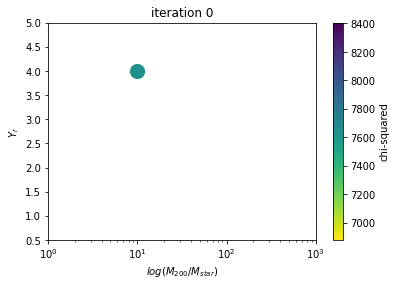

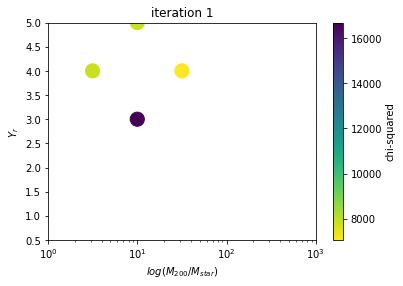

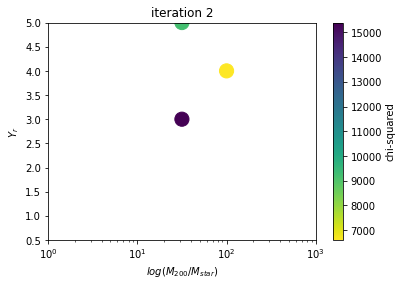

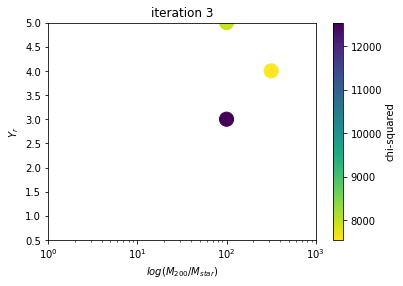

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# get a list of all the iterations which have been run
iterations = np.unique(c.all_models.table['which_iter'])

# get parameter limits specified in the config file
f = c.parspace.get_parameter_from_name('f')
f_lims = (10.**f.par_generator_settings['lo'], 10.**f.par_generator_settings['hi'])
ml = c.parspace.get_parameter_from_name('ml')
ml_lims = (ml.par_generator_settings['lo'], ml.par_generator_settings['hi'])

# plot the models: f vs ml at each iteration:
for iter0 in iterations:
    table = c.all_models.table
    table = table[table['which_iter']==iter0]
    plt.scatter(table['f'],
                table['ml'],
                c=table['chi2'],
                cmap=plt.cm.viridis_r,
                s=200)
    cbar = plt.colorbar()
    cbar.set_label('chi-squared')
    plt.gca().set_title(f'iteration {iter0}')
    plt.gca().set_xlim(*f_lims)
    plt.gca().set_ylim(*ml_lims)
    plt.gca().set_xlabel(f.LaTeX)
    plt.gca().set_ylabel(ml.LaTeX)
    plt.gca().set_xscale('log')
    plt.show()

And finally, we can plot the chi-squared values for all the models we have run in one plot,

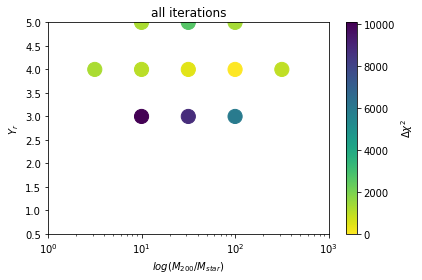

In [6]:
# plot the models: f vs ml altogether
min_chi_squared = np.min(c.all_models.table['chi2'])
delta_chi_squared = c.all_models.table['chi2'] - min_chi_squared
plt.scatter(c.all_models.table['f'],
            c.all_models.table['ml'],
            c=delta_chi_squared,
            cmap=plt.cm.viridis_r,
            s=200)
cbar = plt.colorbar()
cbar.set_label('$\Delta \chi^2$')
plt.gca().set_title(f'all iterations')
plt.gca().set_xlim(*f_lims)
plt.gca().set_ylim(*ml_lims)
plt.gca().set_xlabel(f.LaTeX)
plt.gca().set_ylabel(ml.LaTeX)
plt.gca().set_xscale('log')
plt.tight_layout()
plt.show()

**Exercise** : continue the parameter search for this example, trying to find the optimum fit. Make a plot of the best fitting model once you are satisfied.

**Exercise** : free other parameters, and run some more models.